# Boston Housing 
### Fernando Dario Cordova Berrelleza
### Daniel Lerma Esparza
### Juan Pablo Mudeci Huerta

In [1]:
import numpy as np
import pandas as pd
import random,os
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler,MaxAbsScaler,RobustScaler

In [3]:
DATA_PATH = "C:/Users/D-ani/boston_bueno.csv"
df = pd.read_csv(DATA_PATH)

#2.find null data and fill new data 
def checkNull_fillData(df):
    for col in df.columns:
        if len(df.loc[df[col].isnull() == True]) != 0:
            if df[col].dtype == "float64" or df[col].dtype == "int64":
                df.loc[df[col].isnull() == True,col] = df[col].median()
            else:
                df.loc[df[col].isnull() == True,col] = "missing"
                
checkNull_fillData(df)

In [4]:
print(df)

     OBS.        TOWN  TOWN#  TRACT      LON      LAT  MEDV  CMEDV     CRIM  \
0       1      Nahant      0   2011 -70.9550  42.2550  24.0   24.0  0.00632   
1       2  Swampscott      1   2021 -70.9500  42.2875  21.6   21.6  0.02731   
2       3  Swampscott      1   2022 -70.9360  42.2830  34.7   34.7  0.02729   
3       4  Marblehead      2   2031 -70.9280  42.2930  33.4   33.4  0.03237   
4       5  Marblehead      2   2032 -70.9220  42.2980  36.2   36.2  0.06905   
..    ...         ...    ...    ...      ...      ...   ...    ...      ...   
501   502    Winthrop     91   1801 -70.9860  42.2312  22.4   22.4  0.06263   
502   503    Winthrop     91   1802 -70.9910  42.2275  20.6   20.6  0.04527   
503   504    Winthrop     91   1803 -70.9948  42.2260  23.9   23.9  0.06076   
504   505    Winthrop     91   1804 -70.9875  42.2240  22.0   22.0  0.10959   
505   506    Winthrop     91   1805 -70.9825  42.2210  11.9   19.0  0.04741   

       ZN  ...  CHAS    NOX     RM   AGE     DIS  R

# (a)
### 20 columnas y 506 registros (filas)
### Descripción de las columnas
#### CRIM: Tasa de criminalidad per capita
#### ZN: Zona residencial por lotes de 25,000 pies cuadrados
#### INDUS: Proporción de acres de negocios no minoristas por ciudad
#### CHAS: variable que indica si un suburbio colinda/limita el río Charles
#### NOX: concentración de óxidos nítricos
#### RM: número promedio de habitaciones por vivienda
#### AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940
#### DIS: distancias desproporcionadas a cinco centro de emplo de Boston
#### RAD: índice de accesibilidad a las autopistas radiales
#### TAX: impuestos a la propiedad
#### PTRATIO: colegios por localidad
#### B: proporción de negros por ciudad
#### LSTAT: porcentaje de estado inferior de la población
#### MEDV: Valor mediano de las viviendas ocupadas por sus propietarios

# (b)

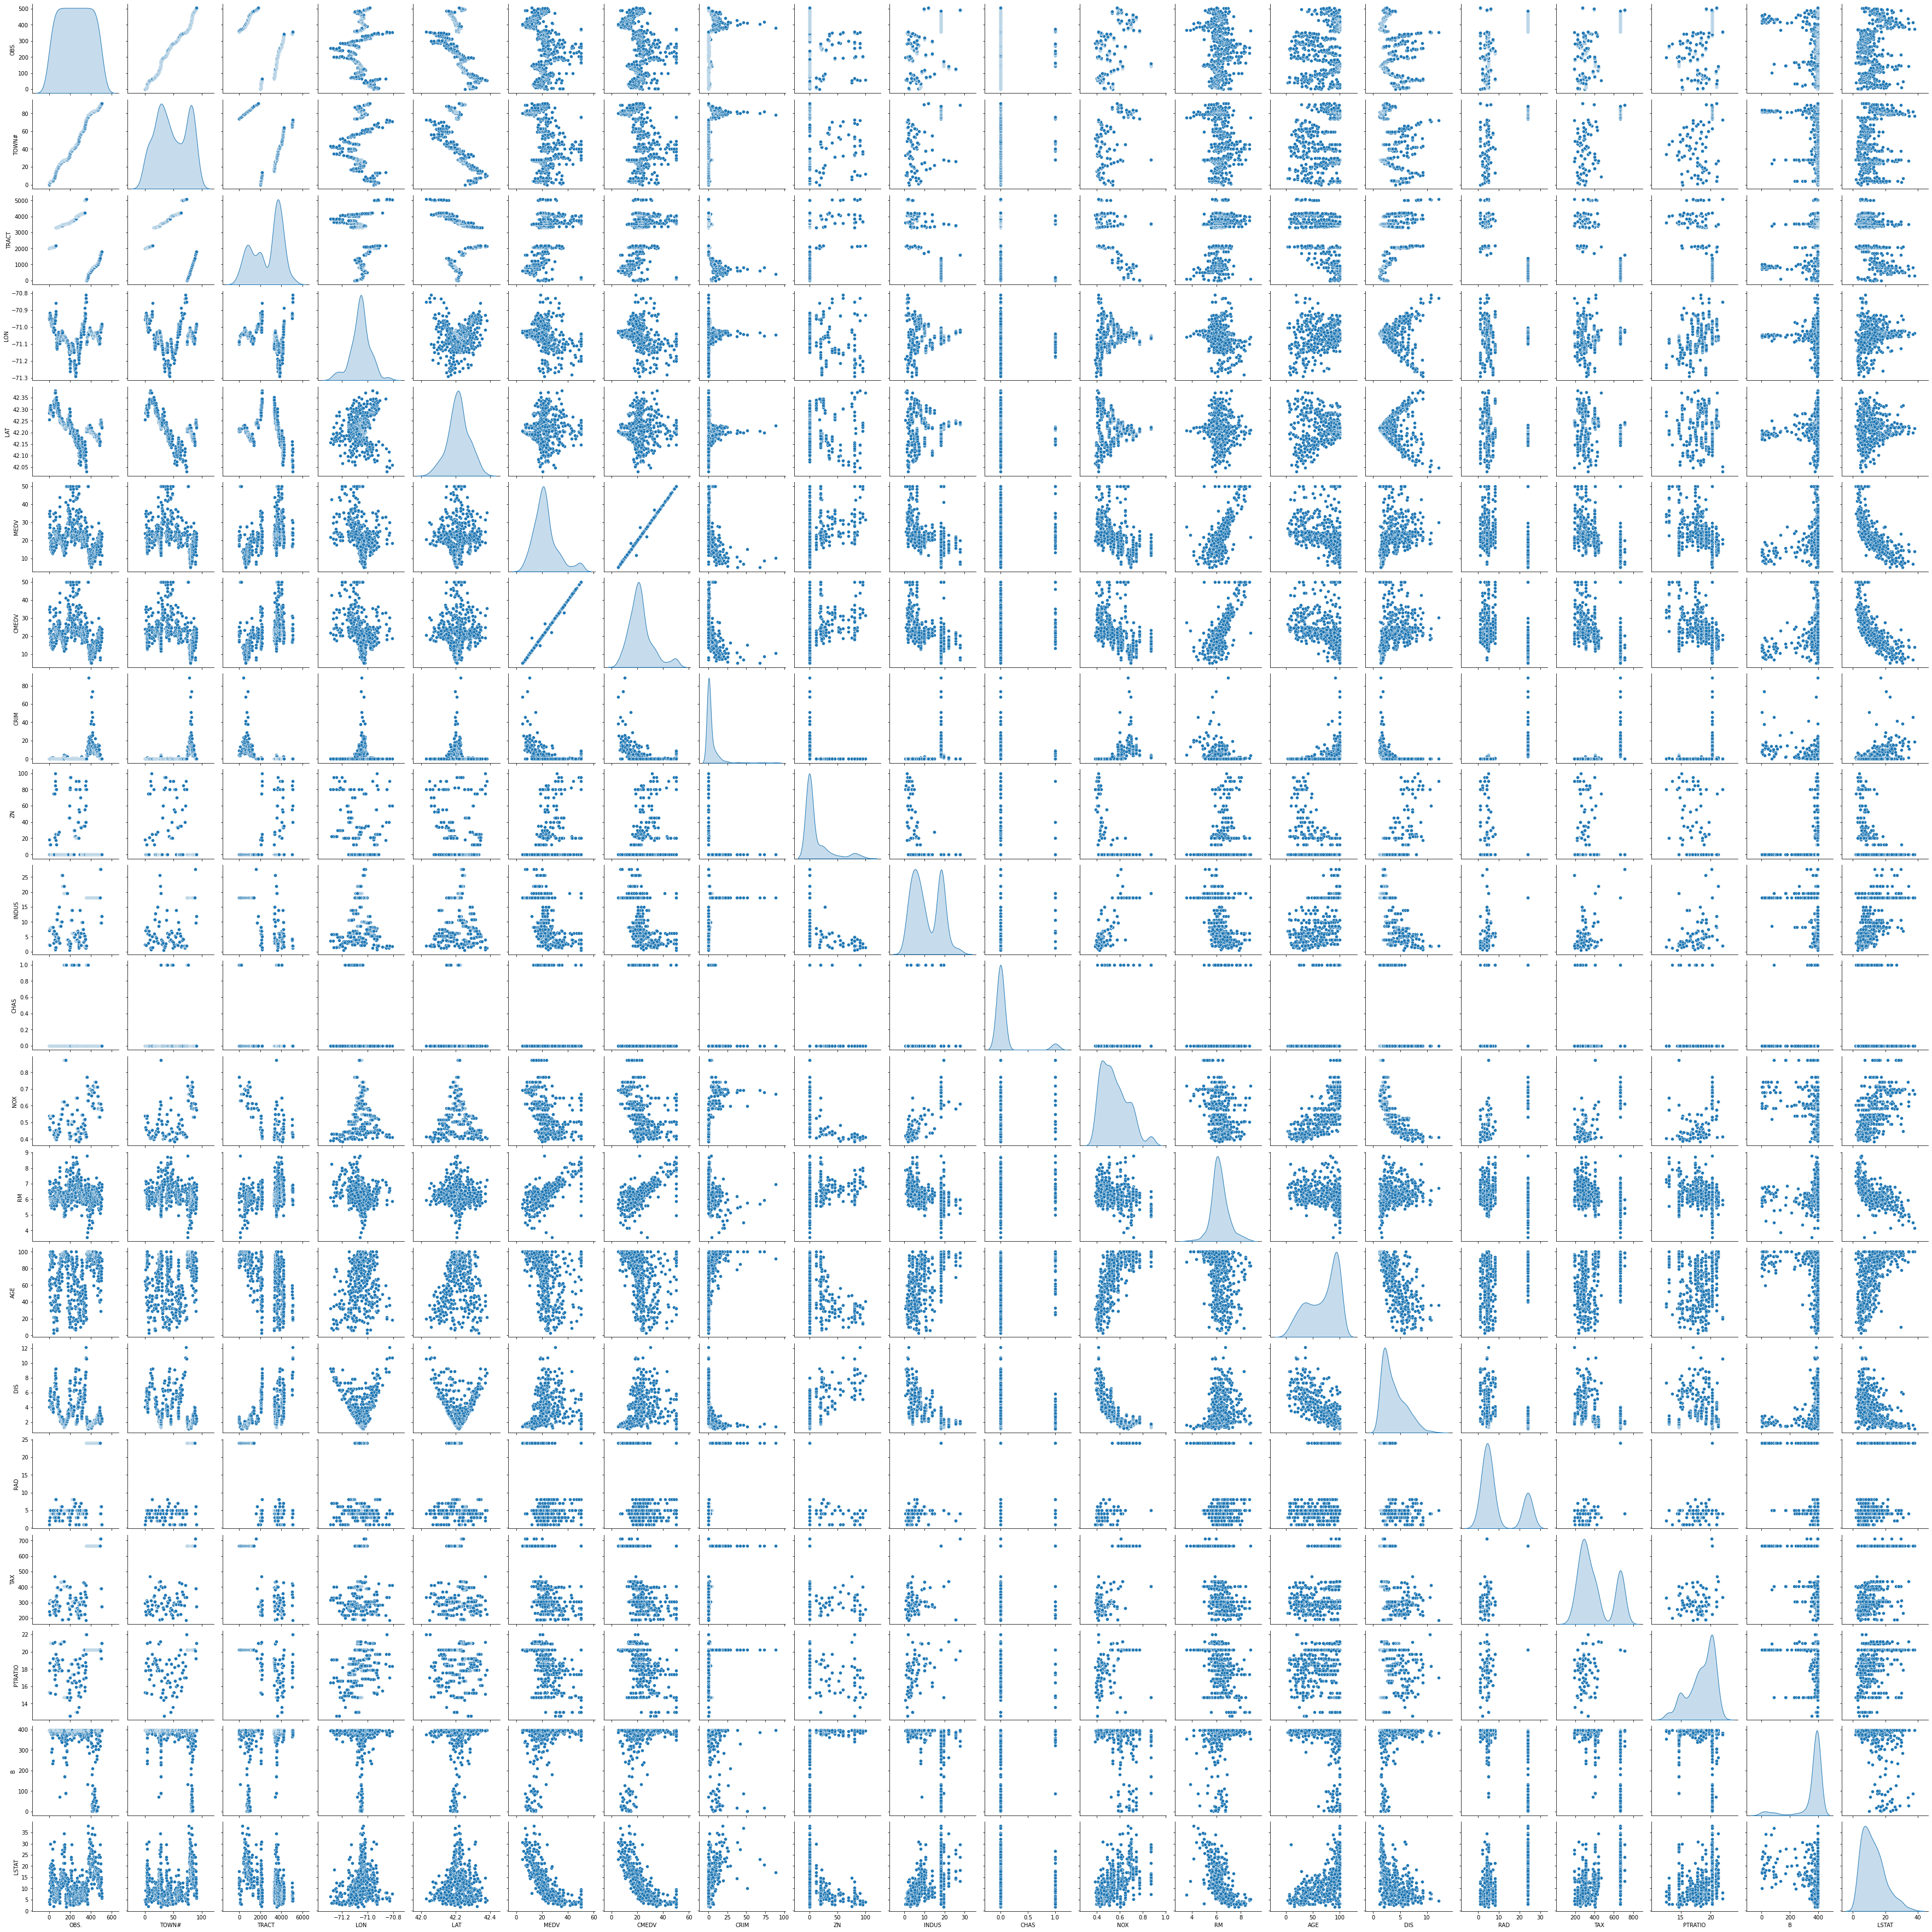

In [5]:
sns.pairplot(df, diag_kind='kde')

In [112]:

df.corr()

,OBS.,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
OBS.,1.000000,0.992287,-0.412863,-0.048973,-0.651668,-0.226604,-0.223373,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.607482,0.666626,0.291074,-0.295041,0.258465
TOWN#,0.992287,1.000000,-0.455757,-0.000627,-0.631648,-0.268006,-0.265134,0.447920,-0.123970,0.434426,-0.009220,0.429399,-0.117334,0.235141,-0.327280,0.634558,0.707982,0.341111,-0.306517,0.296600
TRACT,-0.412863,-0.455757,1.000000,-0.220890,-0.225543,0.426379,0.428252,-0.547165,0.367292,-0.575705,0.041356,-0.569807,0.305207,-0.487465,0.496841,-0.695536,-0.793602,-0.532678,0.365047,-0.522485
LON,-0.048973,-0.000627,-0.220890,1.000000,0.143054,-0.320652,-0.322947,0.065101,-0.218081,0.062702,-0.175619,0.160871,-0.257110,0.204739,-0.011243,-0.031752,0.050663,0.312602,-0.018300,0.195630
LAT,-0.651668,-0.631648,-0.225543,0.143054,1.000000,0.009660,0.006826,-0.084293,-0.129667,-0.041093,-0.044726,-0.068600,-0.069317,0.079035,-0.082981,-0.205597,-0.167718,-0.004527,0.105254,0.045660
MEDV,-0.226604,-0.268006,0.426379,-0.320652,0.009660,1.000000,0.998476,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.304449,-0.468536,-0.507787,0.333461,-0.737663
CMEDV,-0.223373,-0.265134,0.428252,-0.322947,0.006826,0.998476,1.000000,-0.389582,0.360386,-0.484754,0.175663,-0.429300,0.696304,-0.377999,0.249315,-0.308433,-0.471979,-0.505655,0.334861,-0.740836
CRIM,0.407407,0.447920,-0.547165,0.065101,-0.084293,-0.388305,-0.389582,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.540516,0.582764,0.289946,-0.385064,0.455621
ZN,-0.103393,-0.123970,0.367292,-0.218081,-0.129667,0.360445,0.360386,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.331134,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.399439,0.434426,-0.575705,0.062702,-0.041093,-0.483725,-0.484754,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.509460,0.720760,0.383248,-0.356977,0.603800


# (C)
#### Encontramos que hay una relación alta entre la tasa de crímenes y los highways que hay dentro de Boston (corr = 0.62)

-0.3883046085868113

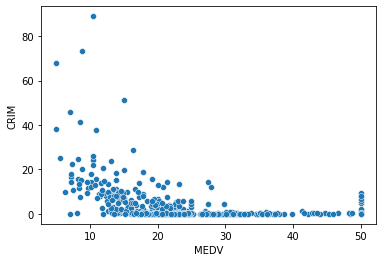

In [7]:
sns.scatterplot(data=df, x=df["MEDV"], y=df["CRIM"])
df["MEDV"].corr(df["CRIM"])

0.5405155913497802

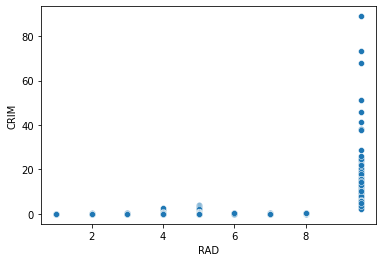

In [8]:
df["RAD"].replace({24: 9.54}, inplace=True)
sns.scatterplot(data=df, x=df["RAD"], y=df["CRIM"])
df["RAD"].corr(df["CRIM"])

### quitamos outliers para evitar que el índice de correlación se viera afectado

In [9]:
df.RAD.max()

9.54

0.5827643120325849

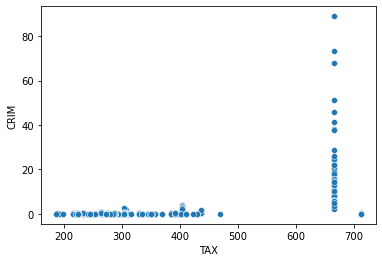

In [10]:
sns.scatterplot(data=df, x=df["TAX"], y=df["CRIM"])
df["TAX"].corr(df["CRIM"])

<AxesSubplot:xlabel='CRIM', ylabel='ZN'>

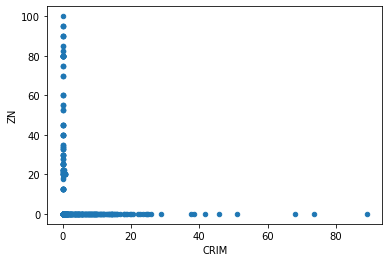

In [11]:
df.plot.scatter(x = 'CRIM', y = 'ZN')

In [12]:
column = df["ZN"]
max_value = column.max()
print(max_value)

100.0


In [13]:
column = df["ZN"]
min_value = column.min()
print(min_value)

0.0


In [14]:
np.corrcoef(df["CRIM"], df["ZN"])

array([[ 1.        , -0.20046922],
       [-0.20046922,  1.        ]])

In [15]:

size = df.size
print(size)

10626


##(e) How many of the suburbs in this data set bound the Charles river? 


In [16]:
subList = df.TOWN.unique()
townList =[]
x = 0
# size del DF es 506
for i in range (0, 506):
    if (df.iloc[i]["CHAS"] == 1 and df.iloc[i]["TOWN"] not in townList):
        townList.append(df.iloc[i]["TOWN"])

print(townList)


['Cambridge', 'Waltham', 'Watertown', 'Newton', 'Dedham', 'Needham', 'Wellesley', 'Dover', 'Boston Allston-Brighton', 'Boston Back Bay', 'Boston Beacon Hill']


# Esta es la mediana de pupil-teacher ratio entre town
(f) What is the median pupil-teacher ratio among the towns in this data set? 


In [17]:
np.median(df.PTRATIO)

19.05

In [18]:
print(df.TOWN,df['TOWN#'])

0          Nahant
1      Swampscott
2      Swampscott
3      Marblehead
4      Marblehead
          ...    
501      Winthrop
502      Winthrop
503      Winthrop
504      Winthrop
505      Winthrop
Name: TOWN, Length: 506, dtype: object 0       0
1       1
2       1
3       2
4       2
       ..
501    91
502    91
503    91
504    91
505    91
Name: TOWN#, Length: 506, dtype: int64


# (d) Do any of the suburbs of Boston appear to have particularly high crime rates? 

In [19]:
subList = df.TOWN.unique()
townList =[]

for i in range (0, len(df)):
    if(i == 0):
        #si es el primer valor agregamos el town a la lista
        townList.append(df.iloc[i]["CRIM"])
        #si no es el primero verificamos si los towns son iguales
    elif (df.iloc[i]["TOWN"] == df.iloc[i-1]["TOWN"]):
        townList.append(df.iloc[i]["CRIM"])
    else:
        print(df.iloc[i-1]["TOWN"], '-', np.median(townList))

        townList.clear()
        townList.append(df.iloc[i]["CRIM"])


Nahant - 0.00632
Swampscott - 0.027299999999999998
Marblehead - 0.03237
Salem - 0.14455
Lynn - 0.903905
Sargus - 0.08879000000000001
Lynnfield - 0.03061
Peabody - 0.17142
Danvers - 0.051705
Middleton - 0.0136
Topsfield - 0.01311
Hamilton - 0.02055
Wenham - 0.01432
Beverly - 0.13791
Manchester - 0.01951
North Reading - 0.039815
Wilmington - 0.12816
Burlington - 0.1252
Woburn - 0.08546999999999999
Reading - 0.03886
Wakefield - 0.054615
Melrose - 0.04993
Stoneham - 0.04203
Winchester - 0.11504
Medford - 0.1396
Malden - 0.14231
Everett - 0.09849
Somerville - 0.35233
Cambridge - 2.1521150000000002
Arlington - 0.07022
Belmont - 0.06738
Lexington - 0.08517
Bedford - 0.01813
Lincoln - 0.01381
Concord - 0.04011
Sudbury - 0.024640000000000002
Wayland - 0.028110000000000003
Weston - 0.027595
Waltham - 0.21719
Watertown - 0.09040999999999999
Newton - 0.444845
Natick - 0.10451
Framingham - 0.19395
Ashland - 0.041835
Sherborn - 0.01538
Brookline - 0.59494
Dedham - 0.16211
Needham - 0.07978
Wellesley

### Si existe un suburbio con tasa de crimenes particularmente altos. El suburbio es: Sargus

### (d) Taxes

In [20]:
subList = df.TOWN.unique()
townList =[]

for i in range (0, len(df)):
    if(i == 0):
        #si es el primer valor agregamos el town a la lista
        townList.append(df.iloc[i]["TAX"])
        #si no es el primero verificamos si los towns son iguales
    elif (df.iloc[i]["TOWN"] == df.iloc[i-1]["TOWN"]):
        townList.append(df.iloc[i]["TAX"])
    else:
        print(df.iloc[i-1]["TOWN"], '-', np.mean(townList))

        startRange = i
        townList.clear()
        townList.append(df.iloc[i]["TAX"])


Nahant - 296.0
Swampscott - 242.0
Marblehead - 222.0
Salem - 311.0
Lynn - 307.0
Sargus - 279.0
Lynnfield - 252.0
Peabody - 233.0
Danvers - 243.0
Middleton - 469.0
Topsfield - 226.0
Hamilton - 313.0
Wenham - 256.0
Beverly - 284.0
Manchester - 216.0
North Reading - 337.0
Wilmington - 345.0
Burlington - 305.0
Woburn - 398.0
Reading - 281.0
Wakefield - 247.0
Melrose - 270.0
Stoneham - 270.0
Winchester - 276.0
Medford - 384.0
Malden - 432.0
Everett - 188.0
Somerville - 437.0
Cambridge - 403.0
Arlington - 296.0
Belmont - 193.0
Lexington - 398.0
Bedford - 265.0
Lincoln - 255.0
Concord - 329.0
Sudbury - 402.0
Wayland - 348.0
Weston - 224.0
Waltham - 277.0
Watertown - 276.0
Newton - 307.0
Natick - 300.0
Framingham - 330.0
Ashland - 315.0
Sherborn - 244.0
Brookline - 264.0
Dedham - 223.0
Needham - 254.0
Wellesley - 216.0
Dover - 198.0
Medfield - 285.0
Millis - 300.0
Norfolk - 241.0
Walpole - 293.0
Westwood - 245.0
Norwood - 289.0
Sharon - 358.0
Canton - 329.0
Milton - 222.0
Quincy - 304.0
Braint

### (d) Pupil teachers ratio

In [21]:
subList = df.TOWN.unique()
townList =[]

for i in range (0, len(df)):
    if(i == 0):
        #si es el primer valor agregamos el town a la lista
        townList.append(df.iloc[i]["PTRATIO"])
        #si no es el primero verificamos si los towns son iguales
    elif (df.iloc[i]["TOWN"] == df.iloc[i-1]["TOWN"]):
        townList.append(df.iloc[i]["PTRATIO"])
    else:
        print(df.iloc[i-1]["TOWN"], '-', np.mean(townList))

        startRange = i
        townList.clear()
        townList.append(df.iloc[i]["PTRATIO"])


Nahant - 15.3
Swampscott - 17.8
Marblehead - 18.7
Salem - 15.200000000000001
Lynn - 21.0
Sargus - 19.2
Lynnfield - 18.3
Peabody - 17.9
Danvers - 16.8
Middleton - 21.1
Topsfield - 17.9
Hamilton - 17.3
Wenham - 15.1
Beverly - 19.7
Manchester - 18.6
North Reading - 16.1
Wilmington - 18.9
Burlington - 19.2
Woburn - 18.7
Reading - 19.0
Wakefield - 18.5
Melrose - 17.8
Stoneham - 18.2
Winchester - 18.0
Medford - 20.900000000000002
Malden - 17.8
Everett - 19.099999999999998
Somerville - 21.199999999999996
Cambridge - 14.699999999999996
Arlington - 16.599999999999998
Belmont - 17.8
Lexington - 15.200000000000001
Bedford - 15.6
Lincoln - 14.4
Concord - 12.6
Sudbury - 17.0
Wayland - 14.7
Weston - 14.7
Waltham - 18.599999999999998
Watertown - 16.4
Newton - 17.399999999999995
Natick - 16.599999999999998
Framingham - 19.1
Ashland - 16.4
Sherborn - 15.9
Brookline - 13.0
Dedham - 18.6
Needham - 17.6
Wellesley - 14.9
Dover - 13.6
Medfield - 15.3
Millis - 15.3
Norfolk - 18.2
Walpole - 16.6
Westwood - 19

#  (g) Which suburb of Boston has lowest median value of owner occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? 


In [22]:
subList = df.TOWN.unique()
townList =[]
minVal = 0
minTown = ''
subMedian = 1000
suburb = "" 
subRange = []
subNumber = 0
startRange = 0


for i in range (0, len(subList)):
    if(i == 0):
        #si es el primer valor agregamos el town a la lista
        townList.append(df.iloc[i]["AGE"])
        #si no es el primero verificamos si los towns son iguales
    elif (df.iloc[i]["TOWN"] == df.iloc[i-1]["TOWN"]):
        townList.append(df.iloc[i]["AGE"])
    else:
        if(np.median(townList) < subMedian):
            subRange = [startRange, i]
            subMedian = np.median(townList)
            suburb = df.iloc[i-1]["TOWN"]
            subNumber = df.iloc[i-1]["TOWN#"]

        startRange = i
        townList.clear()
        townList.append(df.iloc[i]["AGE"])
print(suburb, subNumber, subMedian)



Burlington 17 7.199999999999999


In [23]:
np.corrcoef(df["TOWN#"], df["ZN"])

array([[ 1.        , -0.12396954],
       [-0.12396954,  1.        ]])

In [24]:
print(df["AGE"])

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64


(h) In this data set, how many of the suburbs average more than seven rooms per dwelling?  
More than eight rooms per dwelling? 
Comment on the suburbs that average more than eight rooms per dwelling. 


In [25]:
townList = []
for i in range (0, len(df)):
    if (df.iloc[i]["RM"] >= 7):
        #print(df.iloc[i]["TOWN"])
        if(df.iloc[i]["TOWN"] not in townList):
            townList.append(df.iloc[i]["TOWN"])

print(townList)
print(len(townList))

['Swampscott', 'Marblehead', 'Lynnfield', 'Topsfield', 'Manchester', 'Melrose', 'Winchester', 'Cambridge', 'Belmont', 'Lexington', 'Lincoln', 'Concord', 'Sudbury', 'Wayland', 'Weston', 'Newton', 'Framingham', 'Sherborn', 'Brookline', 'Dedham', 'Needham', 'Wellesley', 'Dover', 'Medfield', 'Westwood', 'Sharon', 'Milton', 'Cohasset', 'Boston Back Bay', 'Boston Beacon Hill', 'Boston Charlestown', 'Boston Savin Hill', 'Boston West Roxbury']
33


In [26]:
townList = []
for i in range (0, len(df)):
    if (df.iloc[i]["RM"] >= 8):
        #print(df.iloc[i]["TOWN"])
        if(df.iloc[i]["TOWN"] not in townList):
            townList.append(df.iloc[i]["TOWN"])

print(townList)
print(len(townList))

['Winchester', 'Cambridge', 'Weston', 'Newton', 'Framingham', 'Brookline', 'Boston Back Bay']
7


# I) Split the data in training (70%) and test (30%) data, use the linear regression model with the training data, and test it to predict House value.  How well did the model perform? How can you improve these results?

In [27]:
# Separar todas las columnas y dejar solo al median value por casa
X1 = df.drop(["CMEDV", "TOWN"], axis=1)
Y = df["CMEDV"]

In [28]:
# split training set (70% entrenamiento - 30% pruebas)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y, test_size = 0.3, random_state=42)

# 3. Model creation - Linear Regression
### modelo que compara el median value con el resto de variables

In [29]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()

# 4. Model training

In [30]:
reg_model.fit(X1_train, Y1_train)

LinearRegression()

In [31]:
Y_predict = reg_model.predict(X1_test)
Y_predict

array([23.71113517, 32.59403219, 13.81455036, 22.79187033, 16.18719037,
       19.88275889, 17.88243587, 13.96172958, 19.69920412, 17.28730919,
       21.57695436, 18.56906557,  6.68309179, 20.99311186, 18.65661526,
       29.72908849, 19.0867292 , 10.06264896, 49.8009376 , 14.2137274 ,
       25.44595085, 29.28073415, 12.64455209, 23.18922307, 14.35699465,
       13.87439075, 20.15154762, 14.93607057, 21.84244204, 18.72627368,
       23.0883931 , 23.95998245, 15.19297276, 20.93095793, 19.04306774,
       19.31993431, 34.56221398, 19.72675549, 24.483714  , 23.33791038,
       19.96106695, 28.39503946, 49.90482909, 17.26668074, 22.70683869,
       15.15401132, 13.14476098, 24.14418811, 19.91656292, 24.00714211,
       18.6657488 , 35.48857546, 15.19910177, 26.47593904, 43.3942128 ,
       21.22049574, 18.47148731, 28.82763608, 23.90603789, 18.48616618,
       24.69267979, 35.15655935, 31.43973805, 20.11843338, 23.74823563,
       20.05243192, 13.23582582, 24.77476006, 30.77790988, 12.74

# Scores

In [32]:
from sklearn.model_selection import cross_val_score
# testing with cross-validation
# cv = 3 porque hay 3 particiones
cross_val_score(reg_model, X1_train, Y1_train, cv=3)


array([0.99721432, 0.99751644, 0.99179844])

In [33]:
reg_model.coef_

array([ 9.01690357e-04,  1.57780196e-03, -7.45744490e-05, -9.17267871e-01,
        8.31695372e-02,  9.79975613e-01, -2.57873894e-03,  9.75407688e-04,
        1.41578095e-03,  8.67614689e-03,  1.48292846e-01,  4.21554305e-02,
        1.48811151e-03, -3.24103821e-02, -2.66578368e-02, -1.35251046e-03,
        1.93380866e-02,  1.75098335e-04, -1.87148300e-02])

In [34]:
reg_model.score(X1_test, Y1_test)

0.9983871328431864

In [35]:
reg_model.intercept_

-68.14967556677531

In [36]:
# calcular el r2 (manera de medir la accuracy de modelos de regresión)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y1_test, Y_predict)
mse

0.12075476925795291

In [37]:
r2_score(Y1_test, Y_predict)

0.9983871328431864

### El resultado arrojado por esta predicción fue bastante bueno, ya que se acerca mucho al 1 en el valor de r^2. Sabemos que mientras más se acerque a 1, quiere decir que la predicción del modelo de regresión se aproxima bastante a los puntos reales. Para mejorar los resultados se nos ocurre que podemos aumentar el número de datos en pruebas y en entrenamiento, al igual que probar combinaciones entre variables con alta y baja correlación. De igual manera, el probar con diferentes modelos podría abrirnos nuevos horizontes y así llegar a un mejor resultado

# (j) We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors. For each predictor, individually, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.


In [38]:
X1 = df.drop(["CRIM", "TOWN"], axis=1)
Y = df["CRIM"]

In [39]:
# split training set (70% entrenamiento - 30% pruebas)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y, test_size = 0.3, random_state=42)

# 3. Model creation - Linear Regression
### modelo que compara el median value con el resto de variables

In [40]:
from sklearn.linear_model import LinearRegression
crim_model = LinearRegression()

# 4. Model training

In [41]:
crim_model.fit(X1_train, Y1_train)

LinearRegression()

In [42]:
Y_predict = crim_model.predict(X1_test)
Y_predict

array([ 1.35805609e+00, -2.36869204e+00,  6.20609898e+00,  1.81794931e-01,
        9.12960387e+00,  3.46191999e+00,  7.49285654e-01,  1.36287049e+00,
        9.33944797e+00,  6.26740766e+00,  5.63448928e-01,  2.39983833e+00,
        1.47604940e+01,  1.78195057e+00, -6.51566902e-02,  7.04008330e+00,
        1.39135091e+00,  1.41777824e+01, -1.36324474e+00,  9.94685120e+00,
       -2.36758054e+00, -8.75905981e-01,  2.77834239e-01,  2.16144633e+00,
        1.22485159e+01,  9.80393261e+00,  1.68703626e+00,  1.12814837e+01,
       -9.69717142e-01,  5.42612348e+00,  8.87638476e-01, -1.63783820e-01,
        1.68134700e+01,  1.14720649e+01,  9.64583516e+00,  6.44567225e-01,
       -1.74851072e+00, -1.15867833e+00, -1.88731306e+00,  3.00679296e-01,
        5.02507458e+00,  3.89363456e+00,  1.18844778e+00,  2.14542983e-01,
        2.08596770e+00,  1.30001318e+01,  3.29826723e-01,  3.30537558e-01,
        8.65552120e+00,  1.46942951e+00,  2.49042092e+00, -6.71032401e-01,
        9.26851062e-01,  

# Scores

In [43]:
from sklearn.model_selection import cross_val_score
# testing with cross-validation
# cv = 3 porque hay 3 particiones
cross_val_score(crim_model, X1_train, Y1_train, cv=3)

array([0.35850863, 0.36993752, 0.53935757])

In [44]:
# calcular el r2 (manera de medir la accuracy de modelos de regresión)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y1_test, Y_predict)
mse

45.48438128500755

In [45]:
r2_score(Y1_test, Y_predict)

0.4652159952767506

# J sacar todos los modelos

In [46]:
reg_model1 = LinearRegression()
reg_model2 = LinearRegression()
reg_model3 = LinearRegression()
reg_model4 = LinearRegression()
reg_model5 = LinearRegression()
reg_model6 = LinearRegression()
reg_model7 = LinearRegression()
reg_model8 = LinearRegression()
reg_model9 = LinearRegression()
reg_model10 = LinearRegression()
reg_model11 = LinearRegression()
reg_model12 = LinearRegression()
reg_model14 = LinearRegression()
reg_model15 = LinearRegression()
reg_model16 = LinearRegression()
reg_model17 = LinearRegression()
reg_model18 = LinearRegression()
reg_model19 = LinearRegression()

In [47]:
model1 = df['ZN']
model2 = df['INDUS']
model3 = df['CHAS']
model4 = df['NOX']
model5 = df['RM']
model6 = df['AGE']
model7 = df['DIS']
model8 = df['RAD']
model9 = df['TAX']
model10 = df['PTRATIO']
model11 = df['B']
model12 = df['LSTAT']
model14 = df['TOWN#']
model15 = df['TRACT']
model16 = df['LON']
model17 = df['LAT']
model18 = df['MEDV']
model19 = df['CMEDV']

In [48]:
X1 = model1.to_numpy().reshape(-1, 1)
X2 = model2.to_numpy().reshape(-1, 1)
X3 = model3.to_numpy().reshape(-1, 1)
X4 = model4.to_numpy().reshape(-1, 1)
X5 = model5.to_numpy().reshape(-1, 1)
X6 = model6.to_numpy().reshape(-1, 1)
X7 = model7.to_numpy().reshape(-1, 1)
X8 = model8.to_numpy().reshape(-1, 1)
X9 = model9.to_numpy().reshape(-1, 1)
X10 = model10.to_numpy().reshape(-1, 1)
X11 = model11.to_numpy().reshape(-1, 1)
X12 = model12.to_numpy().reshape(-1, 1)
X14 = model14.to_numpy().reshape(-1, 1)
X15 = model15.to_numpy().reshape(-1, 1)
X16 = model16.to_numpy().reshape(-1, 1)
X17 = model17.to_numpy().reshape(-1, 1)
X18 = model18.to_numpy().reshape(-1, 1)
X19 = model19.to_numpy().reshape(-1, 1)
y = df['CRIM']

In [49]:
## Split between train and test 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3, random_state = 1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state = 1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.3, random_state = 1)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=0.3, random_state = 1)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y, test_size=0.3, random_state = 1)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y, test_size=0.3, random_state = 1)
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y, test_size=0.3, random_state = 1)
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y, test_size=0.3, random_state = 1)
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y, test_size=0.3, random_state = 1)
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y, test_size=0.3, random_state = 1)
X11_train, X11_test, y11_train, y11_test = train_test_split(X11, y, test_size=0.3, random_state = 1)
X12_train, X12_test, y12_train, y12_test = train_test_split(X12, y, test_size=0.3, random_state = 1)
X14_train, X14_test, y14_train, y14_test = train_test_split(X14, y, test_size=0.3, random_state = 1)
X15_train, X15_test, y15_train, y15_test = train_test_split(X15, y, test_size=0.3, random_state = 1)
X16_train, X16_test, y16_train, y16_test = train_test_split(X16, y, test_size=0.3, random_state = 1)
X17_train, X17_test, y17_train, y17_test = train_test_split(X17, y, test_size=0.3, random_state = 1)
X18_train, X18_test, y18_train, y18_test = train_test_split(X18, y, test_size=0.3, random_state = 1)
X19_train, X19_test, y19_train, y19_test = train_test_split(X19, y, test_size=0.3, random_state = 1)

In [50]:
reg_model1.fit(X1_train, y1_train)
reg_model2.fit(X2_train, y2_train)
reg_model3.fit(X3_train, y3_train)
reg_model4.fit(X4_train, y4_train)
reg_model5.fit(X5_train, y5_train)
reg_model6.fit(X6_train, y6_train)
reg_model7.fit(X7_train, y7_train)
reg_model8.fit(X8_train, y8_train)
reg_model9.fit(X9_train, y9_train)
reg_model10.fit(X10_train, y10_train)
reg_model11.fit(X11_train, y11_train)
reg_model12.fit(X12_train, y12_train)
reg_model14.fit(X14_train, y14_train)
reg_model15.fit(X15_train, y15_train)
reg_model16.fit(X16_train, y16_train)
reg_model17.fit(X17_train, y17_train)
reg_model18.fit(X18_train, y18_train)
reg_model19.fit(X19_train, y19_train)

LinearRegression()

In [51]:
y_predict1 = reg_model1.predict(X1_test)
y_predict2 = reg_model2.predict(X2_test)
y_predict3 = reg_model3.predict(X3_test)
y_predict4 = reg_model4.predict(X4_test)
y_predict5 = reg_model5.predict(X5_test)
y_predict6 = reg_model6.predict(X6_test)
y_predict7 = reg_model7.predict(X7_test)
y_predict8 = reg_model8.predict(X8_test)
y_predict9 = reg_model9.predict(X9_test)
y_predict10 = reg_model10.predict(X10_test)
y_predict11 = reg_model11.predict(X11_test)
y_predict12 = reg_model12.predict(X12_test)
y_predict14 = reg_model14.predict(X14_test)
y_predict15 = reg_model15.predict(X15_test)
y_predict16 = reg_model16.predict(X16_test)
y_predict17 = reg_model17.predict(X17_test)
y_predict18 = reg_model18.predict(X18_test)
y_predict19 = reg_model19.predict(X19_test)

In [52]:
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y1_test, y_predict1),
r2_score(y2_test, y_predict2),
r2_score(y3_test, y_predict3),
r2_score(y4_test, y_predict4),
r2_score(y5_test, y_predict5),
r2_score(y6_test, y_predict6),
r2_score(y7_test, y_predict7),
r2_score(y8_test, y_predict8),
r2_score(y9_test, y_predict9),
r2_score(y10_test, y_predict10),
r2_score(y11_test, y_predict11),
r2_score(y12_test, y_predict12),
r2_score(y15_test, y_predict15),
r2_score(y16_test, y_predict16),
r2_score(y17_test, y_predict17),
r2_score(y18_test, y_predict18),
r2_score(y19_test, y_predict19))
                         

0.030677755851498123 0.14611775444327413 -0.004561205133628565 0.1571711328285379 -0.002936725983851307 0.08398515474100199 0.11168539947120726 0.25152530867480904 0.2809211624906153 0.05374653823090281 0.041700092804970446 0.13714416365337467 0.2544001839338593 -0.009225559416303541 -0.011780048021962974 0.11899966930765993 0.11870354677580586


 
(k) Fit a multiple regression model to predict the response using all the predictors.  
Describe your results.  
For which predictors can we get the best results? 
Which predictors can be eliminated? 


In [53]:
x1 = df.drop(["CRIM", "TOWN","OBS."], axis=1).to_numpy()
y = df["CRIM"]

In [54]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state = 1)

In [55]:
reg_model1 = LinearRegression().fit(X1_train, y1_train)
y_predict1 = reg_model1.predict(X1_test)

In [56]:
reg_model1.score(X1_test, y1_test)

0.2997796549171179

(l) How do your results from (j) compare to your results from (k)? 

se puede observar que si hacemos el modelo de regresión con los campos de manera individual da un resultado muy bajo en cada uno de ellos, el modelo que da el resultado mas alto es uno con un 10% de acierto, que es algo que no esta nada bien, en cambio se puede observar que si usamos todos los valores, da un resultado un poco mas favorable y con una oportunidad de mejora mas grande ya que si lo entrenamos mas con  mas datos es posible subir mas la tasa de acierto

# Creación de modelos

# k) Modelo 1 con 3 predictores
### RM, LSTAT, INDUS - CMEDV

In [57]:
# axis = 1 -> columnas
# quitamos las cols: RM, LSTAT, INDUS y CMEDV (target)
rm_lstat_indus = df.drop(['OBS.', 'TOWN', 'TOWN#', 'TRACT', 'LON', 'LAT', 'MEDV', 'CMEDV', 'CRIM', 'ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B'], axis=1).to_numpy()

In [58]:
X1 = rm_lstat_indus
# target
Y = df["CMEDV"]

In [59]:
# split training set (70% entrenamiento - 30% pruebas)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y, test_size = 0.3, random_state=42)

In [60]:
print(X1_train.shape)
print(X1_test.shape)

(354, 3)
(152, 3)


# 3. Model creation - Linear Regression
### modelo 1 con 3 predictores

In [61]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()

# 4. Model training

In [62]:
reg_model.fit(X1_train, Y1_train)

LinearRegression()

# 5. Prediction

In [63]:
Y_predict = reg_model.predict(X1_test)

In [64]:
Y_predict

array([25.83034726, 31.19403258, 17.3217516 , 26.36663157, 19.53805294,
       23.07296679, 17.0320125 , 14.25574909, 22.15401256, 20.27956377,
       17.43989277, 18.32956533, -2.5056804 , 22.59161549, 20.46566108,
       26.68951766, 17.16157213,  3.55270101, 37.18354777, 18.40556859,
       26.56508668, 27.36920366, 13.19200194, 26.18486567, 19.14901554,
       14.64074853, 22.99123217, 20.70845072, 17.96273117, 19.27873336,
       17.85380998, 27.07251335, 27.14584464, 19.6541956 , 15.36222941,
       17.59728686, 32.96709514, 22.59378406, 20.23007998, 25.90331765,
       12.55077313, 29.01435882, 38.00403218, 19.01105145, 25.99781015,
       16.75000912, 15.98493164, 27.30643125, 19.55125806, 29.36568866,
       20.9248931 , 31.56293515, 17.92304859, 28.50212746, 35.00343299,
       24.10247408, 19.60772262, 31.85749662, 25.30161597, 15.46413642,
       27.22332325, 32.83528907, 30.02100358, 19.24015708, 29.05111351,
       11.00250419, 20.50140601, 26.81193177, 29.89967355, 16.77

# Scores - Model 1 / 3 predictors

In [65]:
from sklearn.model_selection import cross_val_score
# testing with cross-validation
# cv = 3 porque hay 3 particiones
cross_val_score(reg_model, X1_train, Y1_train, cv=3)


array([0.61568161, 0.69221094, 0.59612416])

In [66]:
reg_model.coef_

array([-0.01271632,  4.95792674, -0.67115878])

In [67]:
reg_model.intercept_

0.13906575701083312

In [68]:
# calcular el r2 (manera de medir la accuracy de modelos de regresión)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y1_test, Y_predict)
mse

29.939091957586733

In [69]:
r2_score(Y1_test, Y_predict)

0.6001170105334275

# Modelo 2 con 3 predictores
### RAD, TAX, TRACT - CRIM

In [70]:
# axis = 1 -> columnas
# quitamos las cols: RAD, TAX, TRACT y CRIM (target)
rad_tax_tract = df.drop(['OBS.', 'TOWN', 'TOWN#', 'LON', 'LAT', 'MEDV', 'CMEDV', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT'], axis=1).to_numpy()

In [71]:
X1 = rad_tax_tract
# target
Y = df["CRIM"]

In [72]:
# split training set (70% entrenamiento - 30% pruebas)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y, test_size = 0.3, random_state=42)

# 3. Model creation - Linear Regression
### modelo 1 con 3 predictores

In [73]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()

# 4. Model training

In [74]:
reg_model.fit(X1_train, Y1_train)

LinearRegression()

# 5. Prediction

In [75]:
Y_predict = reg_model.predict(X1_test)
Y_predict

array([9.17800e-02, 5.64400e-02, 1.05740e-01, 9.16400e-02, 5.09017e+00,
       1.01530e-01, 3.18270e-01, 2.90900e-01, 4.03841e+00, 2.24380e-01,
       1.10690e-01, 1.70040e-01, 4.57461e+01, 5.64600e-02, 2.83920e-01,
       4.64689e+00, 9.84900e-02, 1.43337e+01, 1.38100e-02, 9.32909e+00,
       1.62110e-01, 7.97800e-02, 1.13081e+00, 6.26300e-02, 7.02259e+00,
       8.05579e+00, 8.38700e-02, 9.51363e+00, 1.74460e-01, 2.68380e-01,
       1.39140e-01, 1.67600e-01, 1.96091e+01, 3.67822e+00, 4.42228e+00,
       2.14918e+00, 2.72900e-02, 3.42700e-02, 1.35870e-01, 1.95390e-01,
       2.89600e-01, 4.93200e-02, 2.00900e-02, 1.35540e-01, 4.68400e-02,
       6.96215e+00, 1.15172e+00, 8.82600e-02, 4.34879e+00, 6.32000e-03,
       1.17470e-01, 3.70500e-02, 1.23247e+00, 1.14320e-01, 5.40500e-01,
       3.67367e+00, 5.66637e+00, 3.50200e-02, 5.05900e-02, 1.91330e-01,
       1.26500e-01, 1.31100e-02, 4.41780e-01, 8.02710e-01, 7.95000e-02,
       4.35710e-01, 8.71675e+00, 3.65900e-02, 2.76300e-02, 4.668

# Scores - Model 2 / 3 predictors

In [76]:
cross_val_score(reg_model, X1_train, Y1_train, cv=3)

array([1., 1., 1.])

In [77]:
# Estimated coefficients for the linear regression problem
reg_model.coef_

array([-2.85347269e-17,  1.00000000e+00, -2.18263699e-15,  2.48160179e-17])

In [78]:
# the point where the function crosses the y-axis
reg_model.intercept_

7.860379014346108e-14

In [79]:
mse = mean_squared_error(Y1_test, Y_predict)
mse

1.6448840335125337e-27

In [80]:
r2_score(Y1_test, Y_predict)

1.0

# Modelo 3 con 3 predictores
### LAT, TAX, RAD - TOWN#

In [81]:
# axis = 1 -> columnas
# quitamos las cols: LAT, TAX, RAD y TOWN# (target)
lat_tax_rad = df.drop(['OBS.', 'TOWN', 'TRACT', 'LON', 'MEDV', 'CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT'], axis=1).to_numpy()

In [82]:
X1 = lat_tax_rad
# target
Y = df["TOWN#"]

In [83]:
# split training set (70% entrenamiento - 30% pruebas)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y, test_size = 0.3, random_state=42)

# 3. Model creation - Linear Regression
### modelo 3 con 3 predictores

In [84]:
reg_model = LinearRegression()

# 4. Model training

In [85]:
reg_model.fit(X1_train, Y1_train)

LinearRegression()

# 5. Prediction

In [86]:
Y_predict = reg_model.predict(X1_test)
Y_predict

array([2.90000000e+01, 4.70000000e+01, 8.90000000e+01, 1.70000000e+01,
       8.30000000e+01, 1.80000000e+01, 5.90000000e+01, 2.70000000e+01,
       8.50000000e+01, 9.00000000e+01, 3.90000000e+01, 3.00000000e+00,
       8.20000000e+01, 1.80000000e+01, 6.00000000e+01, 8.60000000e+01,
       2.60000000e+01, 7.90000000e+01, 3.30000000e+01, 8.30000000e+01,
       4.60000000e+01, 4.70000000e+01, 4.00000000e+00, 9.10000000e+01,
       8.20000000e+01, 8.60000000e+01, 1.80000000e+01, 8.30000000e+01,
       3.80000000e+01, 9.00000000e+01, 2.90000000e+01, 6.00000000e+01,
       7.80000000e+01, 7.40000000e+01, 8.50000000e+01, 2.80000000e+01,
       1.00000000e+00, 6.30000000e+01, 3.80000000e+01, 1.70000000e+01,
       9.00000000e+01, 5.80000000e+01, 3.70000000e+01, 1.60000000e+01,
       2.10000000e+01, 7.90000000e+01, 4.00000000e+00, 1.70000000e+01,
       8.50000000e+01, 2.47803055e-15, 3.00000000e+00, 4.80000000e+01,
       4.00000000e+00, 2.40000000e+01, 4.50000000e+01, 8.80000000e+01,
      

# Scores - Model 3 / 3 predictors

In [87]:
cross_val_score(reg_model, X1_train, Y1_train, cv=3)

array([1., 1., 1.])

In [88]:
# Estimated coefficients for the linear regression problem
reg_model.coef_

array([1.00000000e+00, 1.89450402e-14, 5.72561650e-17, 4.02595286e-17])

In [89]:
# the point where the function crosses the y-axis
reg_model.intercept_

-8.100187187665142e-13

In [90]:
mse = mean_squared_error(Y1_test, Y_predict)
mse

6.394624141864841e-29

In [91]:
# how well the regression predictions approximate the real data points
r2_score(Y1_test, Y_predict)

1.0

# Modelo 4 con 3 predictores
### AGE, DIS, INDUS - ZN

In [92]:
# axis = 1 -> columnas
# quitamos las cols: AGE, DIS, INDUS y ZN (target)
age_dis_indus = df.drop(['OBS.', 'TOWN', 'TOWN#', 'TRACT', 'LON', 'LAT', 'MEDV', 'CMEDV', 'CRIM', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], axis=1).to_numpy()

In [93]:
X1 = age_dis_indus
# target
Y = df["ZN"]

In [94]:
# split training set (70% entrenamiento - 30% pruebas)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y, test_size = 0.3, random_state=42)

# 3. Model creation - Linear Regression
### modelo 3 con 3 predictores

In [95]:
reg_model = LinearRegression()

# 4. Model training

In [96]:
reg_model.fit(X1_train, Y1_train)

LinearRegression()

# 5. Prediction

In [97]:
Y_predict = reg_model.predict(X1_test)
Y_predict

array([ 1.84558445e-16,  4.00000000e+01,  5.09879916e-15, -2.78775414e-14,
        2.71803035e-15, -3.56799190e-15, -3.38424379e-16,  3.33914857e-15,
        2.27620199e-15, -1.52329680e-15,  3.50206256e-15,  1.25000000e+01,
        5.74325861e-15, -1.11942294e-14, -3.56801081e-15, -6.10075923e-15,
        4.04132903e-15,  5.74714872e-15,  8.00000000e+01,  5.23585572e-15,
        2.00000000e+01,  4.00000000e+01,  3.65193864e-15, -5.42636099e-15,
        4.02007620e-15,  4.02504099e-15, -1.73901348e-14,  3.54805114e-15,
        2.89428901e-15, -4.85828469e-15,  1.78912164e-15, -1.15663820e-14,
        4.99816097e-15,  4.33473385e-15,  3.69115930e-15,  5.16914781e-15,
       -8.38080780e-15, -1.37451889e-14, -9.13911954e-15, -2.84599853e-14,
       -4.01569326e-15,  3.30000000e+01,  9.50000000e+01,  1.25000000e+01,
       -6.38019438e-15,  4.63598399e-15,  4.00480654e-15, -2.83143743e-14,
       -1.59050157e-16,  1.80000000e+01,  1.25000000e+01,  2.00000000e+01,
        2.79277438e-15, -

# Scores - Model 4 / 3 predictors

In [98]:
cross_val_score(reg_model, X1_train, Y1_train, cv=3)

array([1., 1., 1.])

In [99]:
# Estimated coefficients for the linear regression problem
reg_model.coef_

array([ 1.00000000e+00, -2.03050888e-17,  3.64027418e-16, -5.66245497e-17])

In [100]:
# the point where the function crosses the y-axis
reg_model.intercept_

-3.019806626980426e-14

In [101]:
mse = mean_squared_error(Y1_test, Y_predict)
mse

1.2024980807314366e-28

In [102]:
r2_score(Y1_test, Y_predict)

1.0

In [103]:
df

,OBS.,TOWN,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,...,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,Nahant,0,2011,-70.9550,42.2550,24.0,24.0,0.00632,18.0,...,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98
1,2,Swampscott,1,2021,-70.9500,42.2875,21.6,21.6,0.02731,0.0,...,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14
2,3,Swampscott,1,2022,-70.9360,42.2830,34.7,34.7,0.02729,0.0,...,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03
3,4,Marblehead,2,2031,-70.9280,42.2930,33.4,33.4,0.03237,0.0,...,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94
4,5,Marblehead,2,2032,-70.9220,42.2980,36.2,36.2,0.06905,0.0,...,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,Winthrop,91,1801,-70.9860,42.2312,22.4,22.4,0.06263,0.0,...,0,0.573,6.593,69.1,2.4786,1.0,273,21.0,391.99,9.67
502,503,Winthrop,91,1802,-70.9910,42.2275,20.6,20.6,0.04527,0.0,...,0,0.573,6.120,76.7,2.2875,1.0,273,21.0,396.90,9.08
503,504,Winthrop,91,1803,-70.9948,42.2260,23.9,23.9,0.06076,0.0,...,0,0.573,6.976,91.0,2.1675,1.0,273,21.0,396.90,5.64
504,505,Winthrop,91,1804,-70.9875,42.2240,22.0,22.0,0.10959,0.0,...,0,0.573,6.794,89.3,2.3889,1.0,273,21.0,393.45,6.48
